## Problem 1
Dataset from Kaggle: "House Prices Competition"<br>
Source:https://www.kaggle.com/c/house-prices-advanced-regression-techniques<br>
***
#### Essential Libraries
>NumPy : Library for Numeric Computations in Python<br>
>Pandas : Library for Data Acquisition and Preparation<br>
>Matplotlib : Low-level library for Data Visualization<br>
>Seaborn : Higher-level library for Data Visualization<br>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set # set the default Seaborn style for graphics

<function seaborn.rcmod.set(*args, **kwargs)>

#### a) Import Dataset
The dataset is in CSV format; hence we use the `read_csv` function from Pandas. Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
housedata = pd.read_csv('train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**b)** Check the variables (and their types) in the dataset using the `dtypes` attributes.

In [3]:
print(housedata.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


**c)**  Extract only the variables (columns) of type Integer (int64), and store as a new Pandas DataFrame using `select_dtypes` attributes. <br>
    

In [4]:
house_data_num = housedata.select_dtypes(include = np.int64)
print("Data dims: ", house_data_num.shape)
print(house_data_num.info())

Data dims:  (1460, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-n

Alternative way to extract int64 using `.loc` attribute.

In [5]:
houseDataNum = housedata.loc[:, housedata.dtypes == np.int64]
houseDataNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

**d)** Read "data_description.txt" (from the Kaggle data folder) to identify the actual Numeric variables. <br>
    Note : You have to manually read through the text file, and try to judge the actual variable types.

**Non-numeric/Categorical variables:** MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MoSold, YrSold

**e)** Drop non-Numeric variables from the DataFrame to have a clean DataFrame with Numeric variables using `.drop` function

In [6]:
houseDataNum.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold'], axis=1)

,Id,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,8450,706,0,150,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,2,9600,978,0,284,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,3,11250,486,0,434,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,4,9550,216,0,540,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,5,14260,655,0,490,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,0,0,953,953,953,694,0,1647,...,2,460,0,40,0,0,0,0,0,175000
1456,1457,13175,790,163,589,1542,2073,0,0,2073,...,2,500,349,0,0,0,0,0,0,210000
1457,1458,9042,275,0,877,1152,1188,1152,0,2340,...,1,252,0,60,0,0,0,0,2500,266500
1458,1459,9717,49,1029,0,1078,1078,0,0,1078,...,1,240,366,0,112,0,0,0,0,142125


***
## Problem 2

**a)** Find the Summary Statistics (Mean, Median, Quartiles etc) of SalePrice from the Numeric DataFrame using `describe`attribute.

In [7]:
salepriceData = houseDataNum['SalePrice']
salepriceData.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**b)** Visualize the summary statistics and distribution of SalePrice using standard Box-Plot, Histogram, KDE.

<AxesSubplot:>

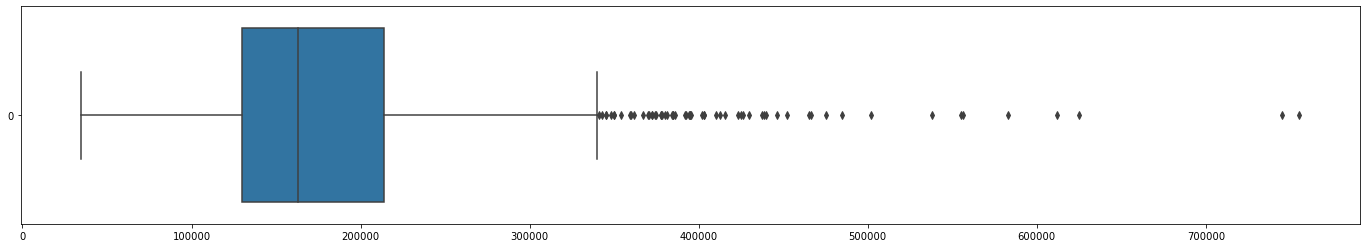

In [8]:
# Box plot
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = salepriceData, orient = "h")

Extend the summary to visualize the complete distribution of the Series.<br>
The first visualization is a simple Histogram with automatic bin sizes.<br>

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

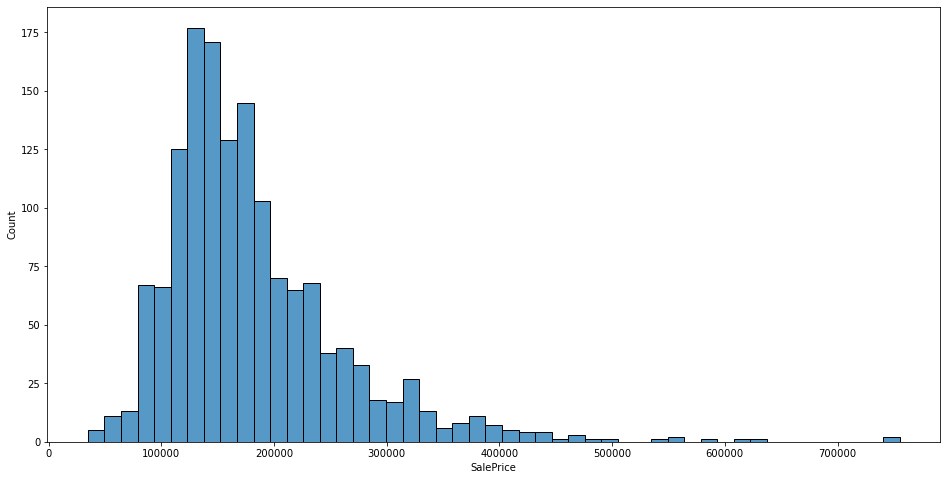

In [9]:
# Histogram
f = plt.figure(figsize=(16, 8))
sb.histplot(data = salepriceData)

The second visualization is a simple Kernel Density Estimate (KDE).

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

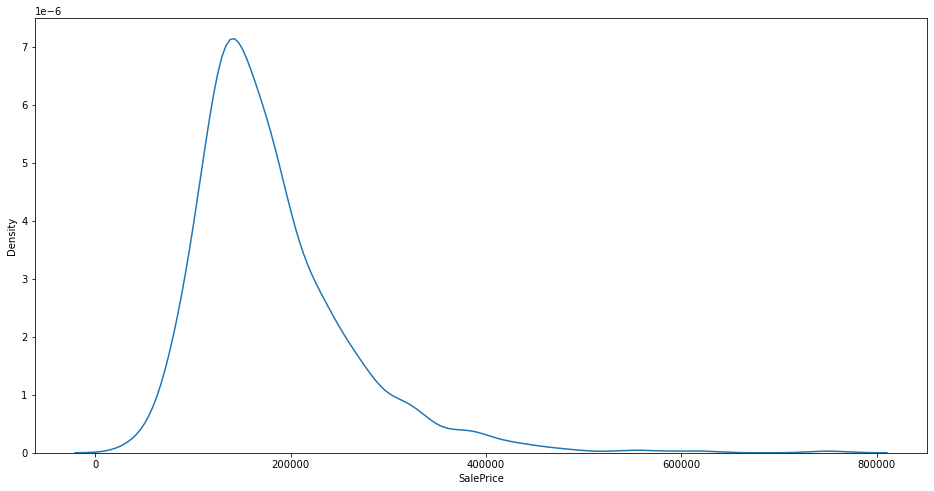

In [10]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = salepriceData)

A combination of Histogram with KDE

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

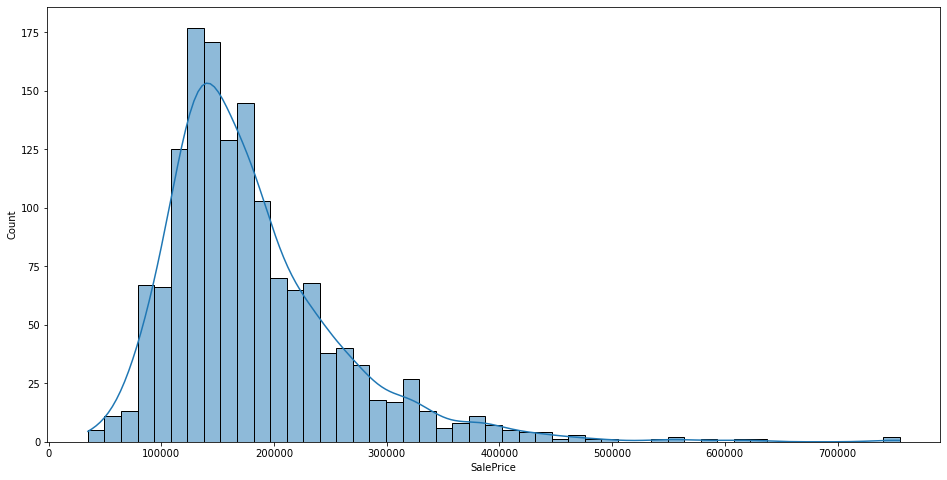

In [11]:
# Histogram with KDE
f = plt.figure(figsize=(16, 8))
sb.histplot(data = salepriceData, kde = True)

**c)** Find the Summary Statistics (Mean, Median, Quartiles etc) of LotArea from the Numeric DataFrame using `describe` attribute.

In [12]:
lotareaData = houseDataNum["LotArea"]
lotareaData.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

**d)** Visualize the summary statistics and distribution of LotArea using standard Box-Plot, Histogram, KDE.

<AxesSubplot:>

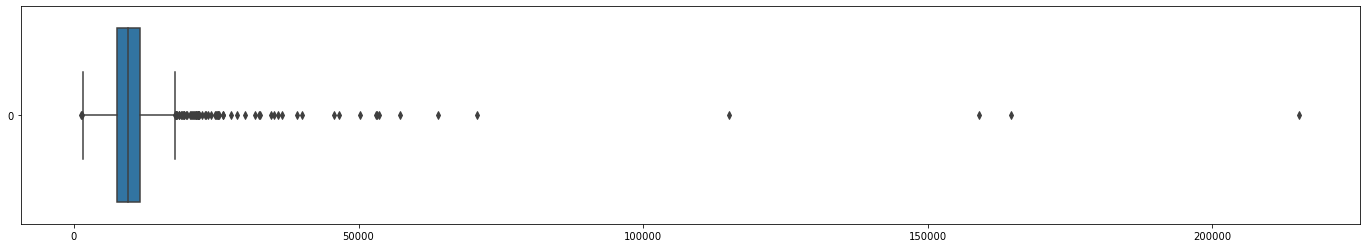

In [13]:
# Box plot
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = lotareaData, orient = "h")

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

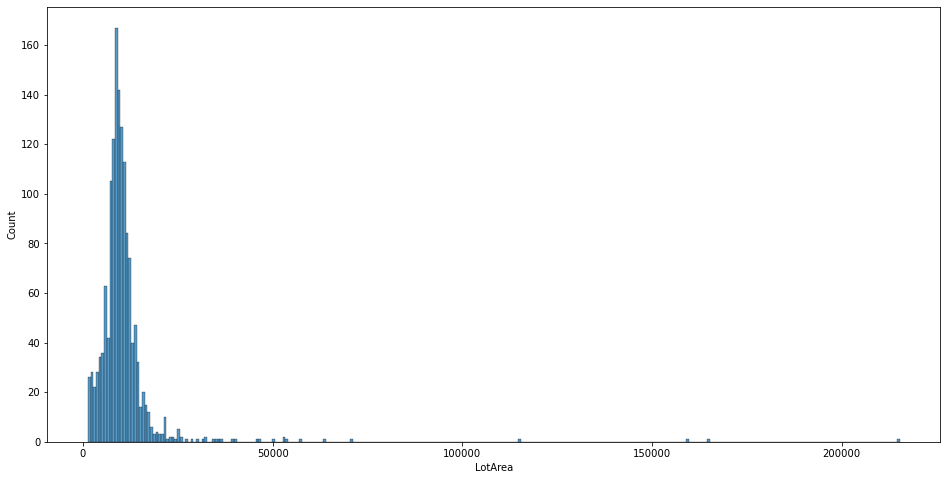

In [14]:
# Histogram
f = plt.figure(figsize=(16, 8))
sb.histplot(data = lotareaData)

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

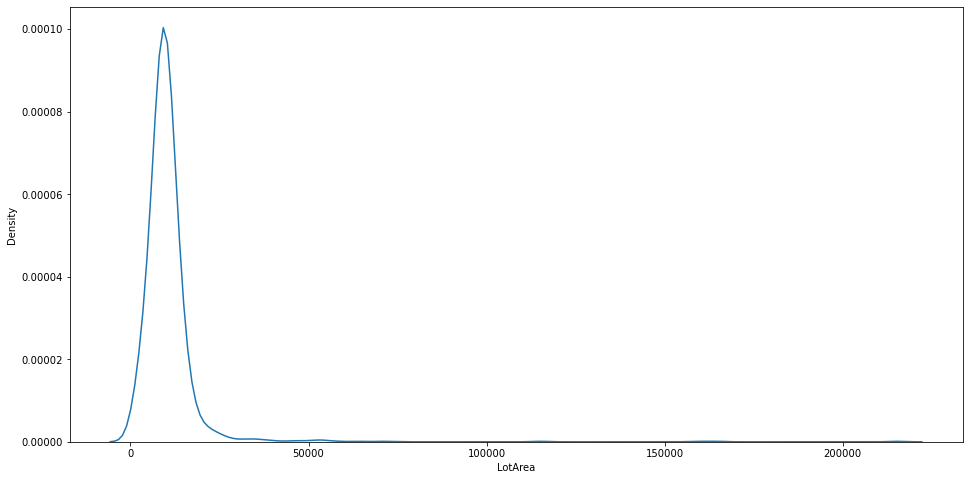

In [15]:
# KDE
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = lotareaData)

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

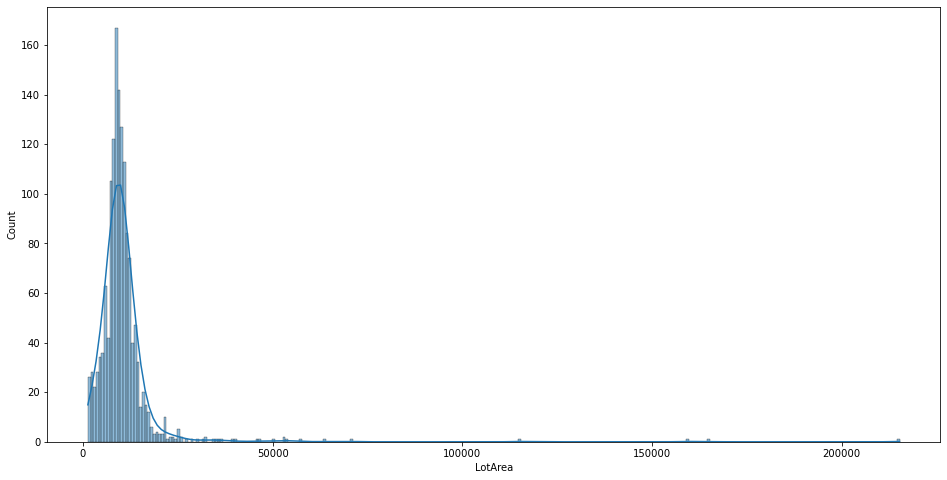

In [16]:
# Histogram with KDE
f = plt.figure(figsize=(16, 8))
sb.histplot(data = lotareaData, kde = True)

**e)** Plot SalePrice (y-axis) vs LotArea (x-axis) using `jointplot`, and check the Correlation between the two

In [17]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([lotareaData, salepriceData], axis = 1)
jointDF

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


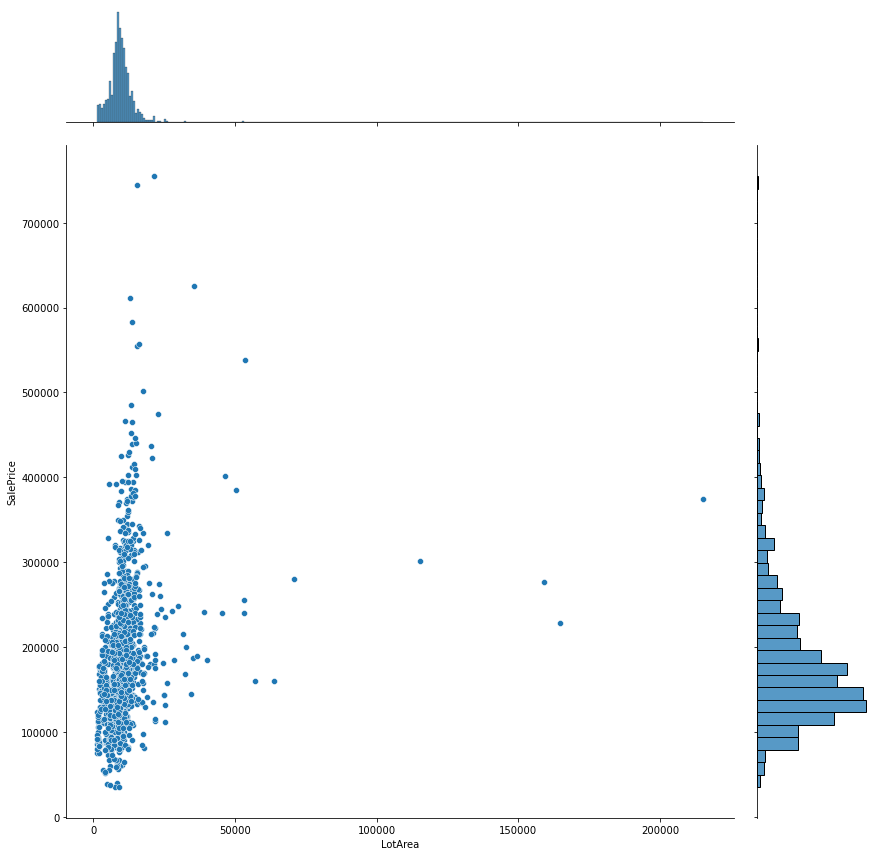

In [18]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 12)

As it tells us something about the **Correlation** between the two variables.

In [19]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


One may visualize the correlation matrix as a `heatmap` to gain a better insight.

<AxesSubplot:>

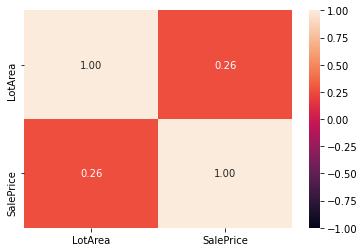

In [20]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")